In [3]:
%pip install python-dotenv requests pandas

  Obtaining dependency information for python-dotenv from https://files.pythonhosted.org/packages/6a/3e/b68c118422ec867fa7ab88444e1274aa40681c606d59ac27de5a5588f082/python_dotenv-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/40/26/f35951c45070edc957ba40a5b1db3cf60a9dbb1b350c2d5bef03e01e61de/charset_normalizer-3.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for idna<4,>=2.5 from https://files.pythonhosted.org/packages/c2/e7/a82b05cf63a603df6e68d59ae6a68bf5064484a0718ea5033660af4b54a9/idna-3.6-py3-none-any.whl.metadata
  Obtaining dependency information for urllib3<3,>=1.

In [4]:
from dotenv import load_dotenv
import os
import requests
import json
import csv

# Load the .env file
load_dotenv()

# Get the value of the 'LM_API' environmental variable
lm_api = os.getenv('LM_API_KEY')
lm_hostname = os.getenv('LM_HOSTNAME')

# Set the headers for the request
headers = {
    "Authorization": f"Bearer {lm_api}"
}

## Plot monthly data

 * [ ]  Get the data from transactions and put it into a data frame
 * [ ]  Plot the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# using pandas, get the date of the start of the month and then the date of the previous month
today = pd.to_datetime('today')
start_of_this_month = today.replace(day=1)
end_of_previous_month = start_of_this_month - pd.Timedelta(days=1)
start_of_previous_month = start_of_this_month - pd.offsets.MonthBegin(1)


url = f"{lm_hostname}/v1/transactions"

params = {
    "start_date": start_of_this_month.strftime('%Y-%m-%d'),
    "end_date": today.strftime('%Y-%m-%d')
}

response = requests.get(url, headers=headers, params=params)

# sum the amount of all the transactions for the current month
transactions = response.json()['transactions']
df = pd.DataFrame(transactions)

# print (df[['date', 'amount', 'exclude_from_totals']].head())


df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['amount']=df['amount'].astype(float)
df['exclude_from_totals']=df['exclude_from_totals'].astype(bool)


filtereddf = df[(df["exclude_from_totals"] == False) & (df['is_income']== False)]
thismonthdf = filtereddf['amount'].groupby(df['date'].dt.to_period('d')).sum().reset_index()
print (f"This month\n{thismonthdf.head()}")


params = {
    "start_date": start_of_previous_month.strftime('%Y-%m-%d'),
    "end_date": end_of_previous_month.strftime('%Y-%m-%d')
}

response = requests.get(url, headers=headers, params=params)

# sum the amount of all the transactions for the current month
transactions = response.json()['transactions']
df = pd.DataFrame(transactions)

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['amount']=df['amount'].astype(float)
df['exclude_from_totals']=df['exclude_from_totals'].astype(bool)
df['is_income']=df['is_income'].astype(bool)


filtereddf = df[(df["exclude_from_totals"] == False) & (df['is_income']== False)]
lastmonthdf = filtereddf['amount'].groupby(df['date'].dt.to_period('d')).sum().reset_index()
print (f"Last month\n{lastmonthdf.head()}")


# Merge the two DataFrames based on the 'Date' column
merged_df = pd.merge(thismonthdf, lastmonthdf, on='date', how='outer', suffixes=('_current', '_last'))


# Fill NaN values with 0
merged_df = merged_df.fillna(0)


# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(lastmonthdf))

plt.bar(index, lastmonthdf['amount'], width=bar_width, label='Last Month')
plt.bar(index + bar_width, thismonthdf['amount'], width=bar_width, label='Current Month')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Comparison of Last Month and Current Month Spending')
plt.xticks(index + bar_width / 2, lastmonthdf['date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Percentage of current month: 0.10


KeyError: 'amount'

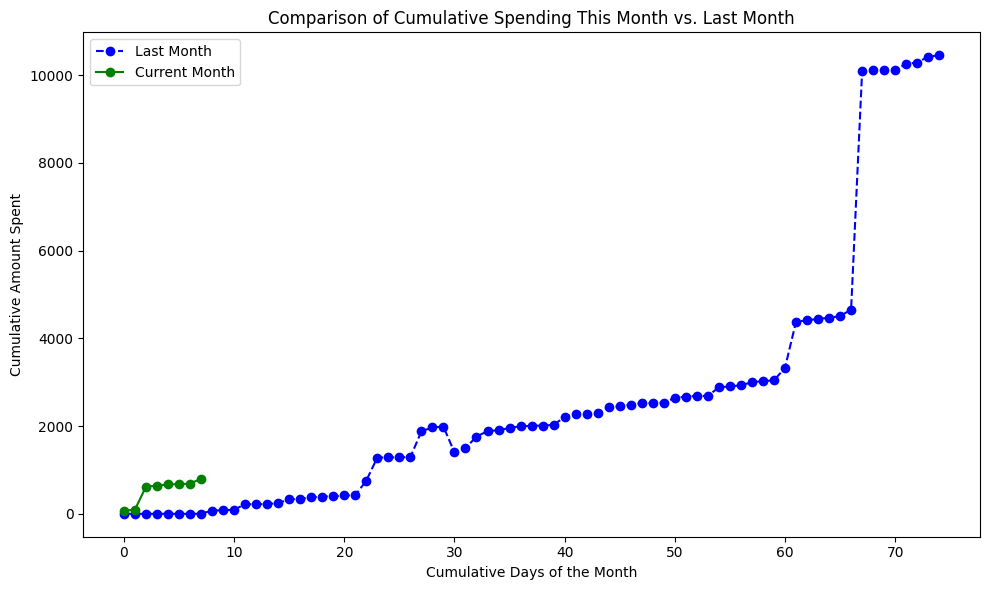

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# using pandas, get the date of the start of the month and then the date of the previous month
today = pd.to_datetime('today')
start_of_this_month = today.replace(day=1)
end_of_previous_month = start_of_this_month - pd.Timedelta(days=1)
start_of_previous_month = start_of_this_month - pd.offsets.MonthBegin(1)


url = f"{lm_hostname}/v1/transactions"

params = {
    "start_date": start_of_this_month.strftime('%Y-%m-%d'),
    "end_date": today.strftime('%Y-%m-%d')
}

response = requests.get(url, headers=headers, params=params)

# sum the amount of all the transactions for the current month
transactions = response.json()['transactions']
df = pd.DataFrame(transactions)


# print (df[['date', 'amount', 'exclude_from_totals']].head())


df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['amount']=df['amount'].astype(float)
df['exclude_from_totals']=df['exclude_from_totals'].astype(bool)
df['is_income']=df['is_income'].astype(bool)


thismonthdf = df[(df["exclude_from_totals"] == False) & (df['is_income']== False)]


params = {
    "start_date": start_of_previous_month.strftime('%Y-%m-%d'),
    "end_date": end_of_previous_month.strftime('%Y-%m-%d')
}

response = requests.get(url, headers=headers, params=params)

# sum the amount of all the transactions for the current month
transactions = response.json()['transactions']
df = pd.DataFrame(transactions)

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['amount']=df['amount'].astype(float)
df['exclude_from_totals']=df['exclude_from_totals'].astype(bool)
df['is_income']=df['is_income'].astype(bool)


lastmonthdf = df[(df["exclude_from_totals"] == False) & (df['is_income']== False)]


# Merge the two DataFrames based on the 'Date' column
merged_df = pd.merge(thismonthdf, lastmonthdf, on='date', how='outer', suffixes=('_current', '_last'))


# Fill NaN values with 0
merged_df = merged_df.fillna(0)

# Calculate the cumulative sum for each day
merged_df['cumulative_current'] = merged_df['amount_current'].cumsum()
merged_df['cumulative_last'] = merged_df['amount_last'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))

# Plot the cumulative spending for last month
plt.plot(merged_df['cumulative_last'], marker='o', label='Last Month', linestyle='--', color='blue')

# Plot the cumulative spending for current month up to the current date
plt.plot(merged_df['cumulative_current'][:len(thismonthdf)], marker='o', label='Current Month', linestyle='-', color='green')


plt.xlabel('Cumulative Days of the Month')
plt.ylabel('Cumulative Amount Spent')
plt.title('Comparison of Cumulative Spending This Month vs. Last Month')
plt.legend()
plt.tight_layout()
# plt.show()

# Find the proportionate cumulative spending for the last month at the same point in time
percentage_of_current_month = today.day / today.days_in_month
print(f"Percentage of current month: {percentage_of_current_month:.2f}")
equivalent_day_of_previous_month = start_of_previous_month + pd.Timedelta(days=(-1+(today.day * start_of_previous_month.days_in_month) / today.days_in_month))

# Find the cumulative amount on the equivalent day in the last month
cumulative_last_on_equivalent_day = merged_df.loc[merged_df['date'] == equivalent_day_of_previous_month, 'cumulative_last']
print(cumulative_last_on_equivalent_day)

# Print the result
#print(f"Cumulative amount on {equivalent_day_of_previous_month.strftime('%Y-%m-%d')} in the last month: {cumulative_last_on_equivalent_day:,.2f}")
print (today, equivalent_day_of_previous_month)


                                                           
